In [23]:
import logging
import sys
sys.path.append('/remote/gpu02/crescenzo/MadMiner')
from madminer.lhe import LHEReader

In [24]:
# MadMiner output
logging.basicConfig(
    format="%(asctime)-5.5s %(name)-20.20s %(levelname)-7.7s %(message)s",
    datefmt="%H:%M",
    level=logging.INFO,
)

# Output of all other modules (e.g. matplotlib)
for key in logging.Logger.manager.loggerDict:
    if "madminer" not in key:
        logging.getLogger(key).setLevel(logging.WARNING)

In [25]:
from madminer import MadMiner
import numpy as np

In [26]:
miner = MadMiner()

miner.add_parameter(
    lha_block="dim6",
    lha_id=2,
    parameter_name="CWL2",
    morphing_max_power=2,
)
miner.add_parameter(
    lha_block="dim6",
    lha_id=5,
    parameter_name="CPWL2",
    morphing_max_power=2,
)

14:00 madminer.core.madmin INFO    Adding parameter: CWL2 (LHA: dim6 2, Power: 2, Range: (0.0, 1.0))
14:00 madminer.core.madmin WARNING Resetting benchmarks and morphing
14:00 madminer.core.madmin INFO    Adding parameter: CPWL2 (LHA: dim6 5, Power: 2, Range: (0.0, 1.0))
14:00 madminer.core.madmin WARNING Resetting benchmarks and morphing


In [27]:
miner.cs_set_morphing(max_overall_power=2)

14:00 madminer.core.madmin INFO    Optimizing basis for morphing the cross sections only
14:00 madminer.core.madmin INFO    Testing out


In [28]:
import numpy as np
(miner.morpher.cs_basis)

array([[ 0.        ,  0.        ],
       [ 0.56661792, -0.41728421],
       [ 0.8189023 , -1.05375245],
       [-0.54380085, -0.42645141],
       [-0.78392276, -1.07456155],
       [ 0.00930565, -0.58118452]])

In [29]:
import matplotlib.pyplot as plt
ths = []
v = []
for j in range(500):
    th = np.random.uniform(-100,100,2)
    ths.append(th)
    v.append(miner.morpher.compute_weight_no_sigma(th))

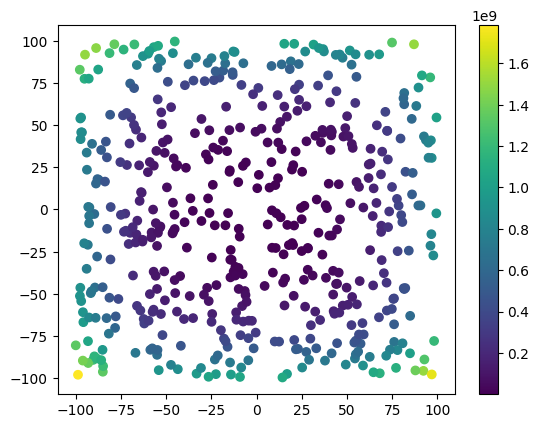

In [30]:
ths = np.asarray(ths)
plt.scatter(ths[:,0],ths[:,1],c=v)
plt.colorbar()

In [31]:
import matplotlib.pyplot as plt

In [41]:
for j in range(10):

    miner2 = MadMiner()

    miner2.add_parameter(
        lha_block="dim6",
        lha_id=2,
        parameter_name="CWL2",
        morphing_max_power=2,
    )
    miner2.add_parameter(
        lha_block="dim6",
        lha_id=5,
        parameter_name="CPWL2",
        morphing_max_power=2,
    )
    miner2.cs_set_morphing_2(max_overall_power=2)
    ###
    print(np.linalg.cond(miner2.morpher.cs_basis))

14:02 madminer.core.madmin INFO    Adding parameter: CWL2 (LHA: dim6 2, Power: 2, Range: (0.0, 1.0))
14:02 madminer.core.madmin WARNING Resetting benchmarks and morphing
14:02 madminer.core.madmin INFO    Adding parameter: CPWL2 (LHA: dim6 5, Power: 2, Range: (0.0, 1.0))
14:02 madminer.core.madmin WARNING Resetting benchmarks and morphing
14:02 madminer.core.madmin INFO    Optimizing basis for morphing the cross sections only
14:02 madminer.core.madmin INFO    Testing out
14:02 madminer.core.madmin INFO    Adding parameter: CWL2 (LHA: dim6 2, Power: 2, Range: (0.0, 1.0))
14:02 madminer.core.madmin WARNING Resetting benchmarks and morphing
14:02 madminer.core.madmin INFO    Adding parameter: CPWL2 (LHA: dim6 5, Power: 2, Range: (0.0, 1.0))
14:02 madminer.core.madmin WARNING Resetting benchmarks and morphing
14:02 madminer.core.madmin INFO    Optimizing basis for morphing the cross sections only
14:02 madminer.core.madmin INFO    Testing out
14:02 madminer.core.madmin INFO    Adding para

1.833379131236445
1.3201624884033731
3.523514900540158
1.3233492642941582
1.0576570768640539
1.3248710216388078
2.081050227499496
1.468840852382574
2.094344882784726
2.288290744803717


In [42]:
print(np.linalg.cond(miner2.morpher.cs_basis))

2.288290744803717


In [6]:
miner.save("data/setup.h5")

11:49 madminer.core.madmin INFO    Saving setup (including morphing) to data/setup.h5


In [7]:
mg_dir = "/remote/gpu02/crescenzo/MG5_aMC_v3_5_3"
for j,elem in enumerate(miner.benchmarks.keys()):
    miner.run(
    sample_benchmark=elem,
    mg_directory=mg_dir,
    mg_process_directory=f"./mg_processes/signal_{j}",
    proc_card_file="cards/proc_card_signal.dat",
    param_card_template_file="cards/param_card_template.dat",
    run_card_file="cards/run_card_signal_large.dat",
    log_directory=f"logs/signal_{j}",
    python_executable="python3",
    only_prepare_script=True
)

11:49 madminer.core.madmin INFO    Adding python3 bin folder to PATH
11:49 madminer.core.madmin INFO    Using Python executable /remote/gpu02/crescenzo/environment/bin/python3
11:49 madminer.utils.inter INFO    Generating MadGraph process folder from cards/proc_card_signal.dat at ./mg_processes/signal_0
11:49 madminer.utils.inter INFO    Calling MadGraph: export PATH=/remote/gpu02/crescenzo/environment/bin:$PATH; python3 /remote/gpu02/crescenzo/MG5_aMC_v3_5_3/bin/mg5_aMC /tmp/generate.mg5
11:49 madminer.core.madmin INFO    Run 0
11:49 madminer.core.madmin INFO      Sampling from benchmark: SM
11:49 madminer.core.madmin INFO      Original run card:       cards/run_card_signal_large.dat
11:49 madminer.core.madmin INFO      Original Pythia8 card:   None
11:49 madminer.core.madmin INFO      Original MadSpin card:   None
11:49 madminer.core.madmin INFO      Original config card:    None
11:49 madminer.core.madmin INFO      Copied run card:         madminer/cards/run_card_0.dat
11:49 madmine